Initial DataFrame:
  User ID  Fan Challenges Completed  Predictive Accuracy (%)  \
0    U001                         5                       80   
1    U002                         8                       60   
2    U003                         3                       90   
3    U004                         7                       70   
4    U005                         2                       50   

   Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
0                              3                                    10   
1                              1                                     8   
2                              0                                     6   
3                              2                                    15   
4                              5                                     3   

   Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
0                      120                                       20  
1          

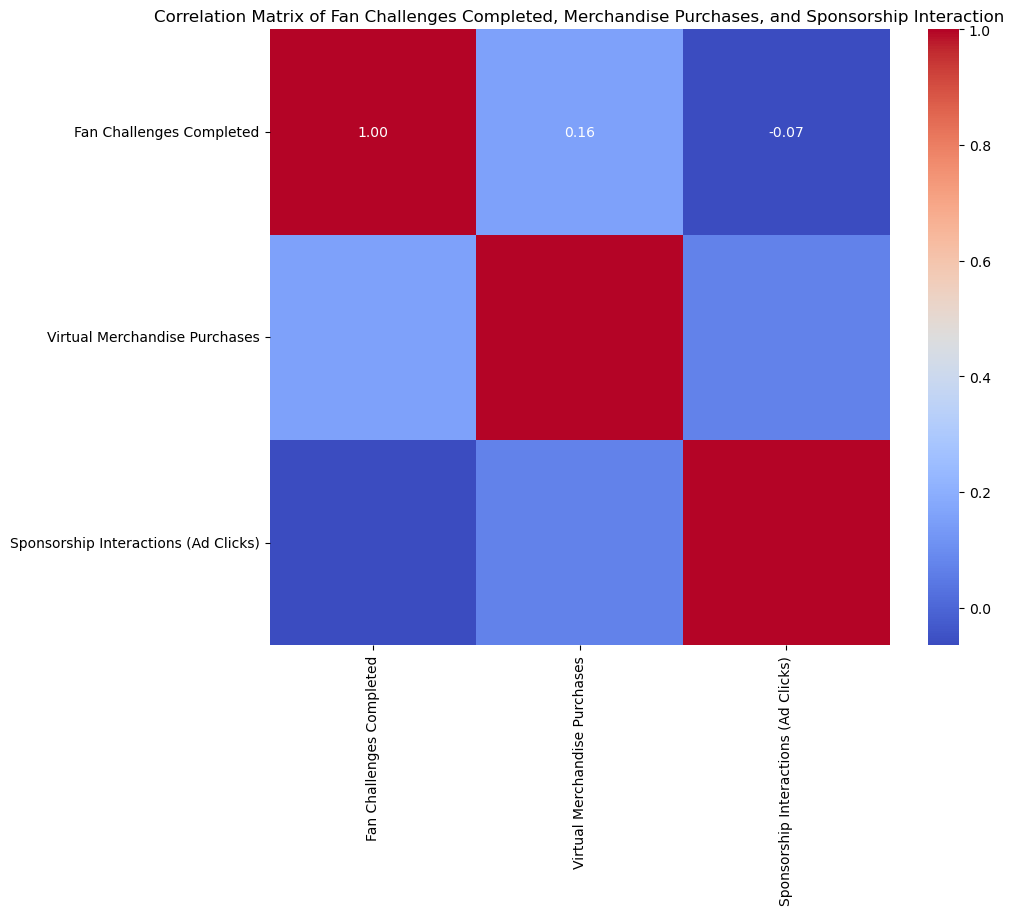

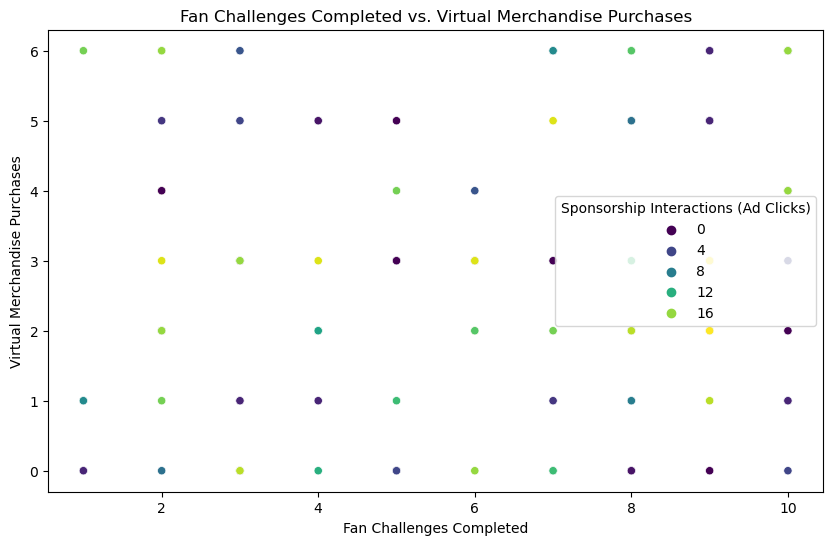

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


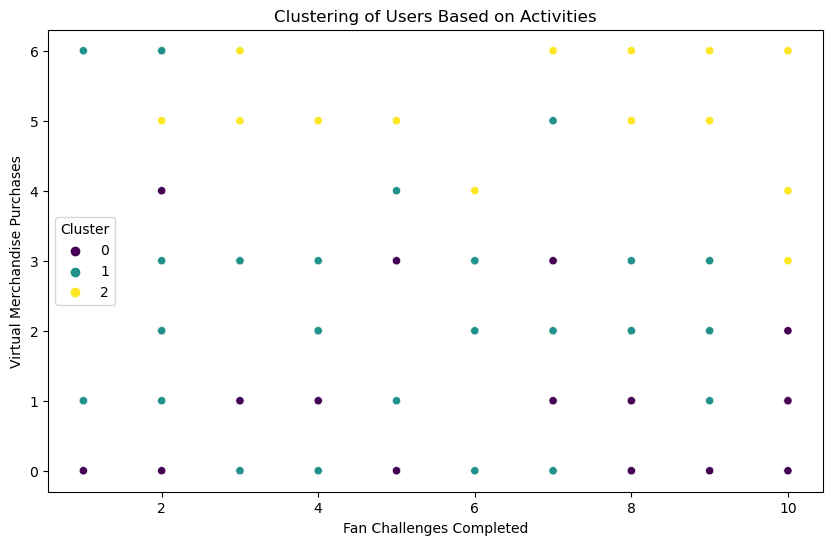

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.20      0.29         5
           2       0.20      0.33      0.25         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3

    accuracy                           0.10        20
   macro avg       0.10      0.08      0.08        20
weighted avg       0.15      0.10      0.11        20

Confusion Matrix:
[[0 1 0 1 0 0 0]
 [2 1 0 0 1 0 1]
 [1 0 1 0 0 1 0]
 [1 0 2 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 1 1 0 0 1]
 [1 0 1 0 0 1 0]]


C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


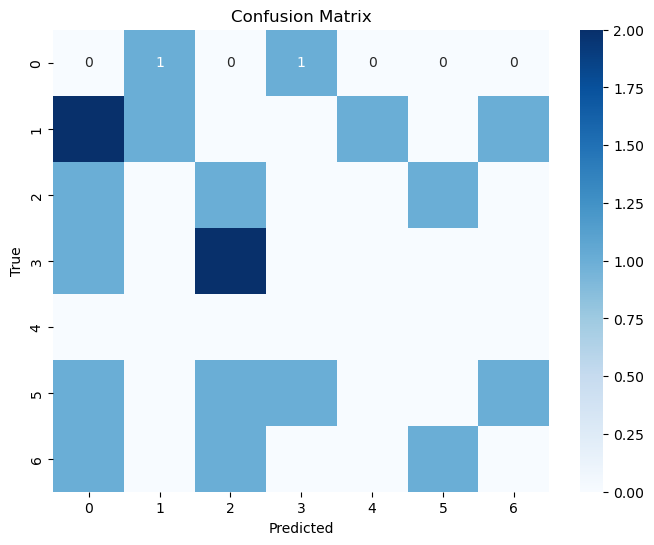

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_csv('C:/Users/danie/Downloads/2025-VeloCityX-Expanded-Fan-Engagement-Data-cleaned.csv')

# Initial exploration
print("Initial DataFrame:")
print(df.head())
print(df.info())
print(df.describe())

# Group by user and calculate the total virtual merchandise purchased
user_merch_purchases = df.groupby('User ID')['Virtual Merchandise Purchases'].sum().reset_index()

# Sort users by the total virtual merchandise purchased
top_users = user_merch_purchases.sort_values(by='Virtual Merchandise Purchases', ascending=False)
print("\nTop users most likely to purchase virtual merchandise:")
print(top_users.head())

# Analyze Fan Challenges Completed during race events and their correlation with merchandise purchases and sponsorship interactions
# Correlation matrix
correlation_matrix = df[['Fan Challenges Completed', 'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)']].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Fan Challenges Completed, Merchandise Purchases, and Sponsorship Interaction')
plt.show()

# Scatter plot to visualize the relationship between race event activity and virtual merchandise purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fan Challenges Completed', y='Virtual Merchandise Purchases', hue='Sponsorship Interactions (Ad Clicks)', palette='viridis')
plt.title('Fan Challenges Completed vs. Virtual Merchandise Purchases')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Virtual Merchandise Purchases')
plt.show()

# Preprocess the data
# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Fan Challenges Completed', 'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)']])

# Apply clustering to identify user segments
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fan Challenges Completed', y='Virtual Merchandise Purchases', hue='Cluster', palette='viridis')
plt.title('Clustering of Users Based on Activities')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Virtual Merchandise Purchases')
plt.show()

# Apply predictive modeling to predict virtual merchandise purchases
# Define features and target
X = df[['Fan Challenges Completed', 'Sponsorship Interactions (Ad Clicks)']]
y = df['Virtual Merchandise Purchases']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()